# **MNIST CLASSIFIER**
This is a classifier of handwritten numbers. 

Dataset : "insert kaggle link"

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization as BatchNorm, Input, Dense, Flatten, Activation, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.metrics import Accuracy

## Loading the dataset

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#splitting the data into x_train and y_train
y_train = data_train['label']
x_train = data_train.drop('label', axis=1)
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
#checking for null values
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
y_train.isnull().any()

False

### The train dataset is clean. So we can proceed without handling null values.



## Data Analysis

In [7]:
data_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


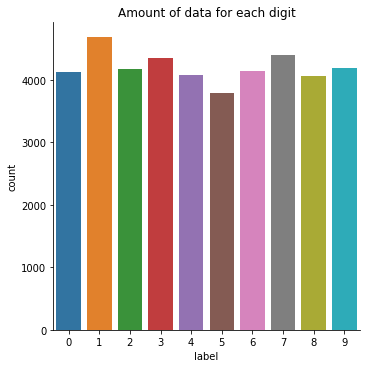

In [8]:
#count of data representing each digit
sns.catplot(kind='count', data=data_train, x='label')
plt.title('Amount of data for each digit')
plt.show()

### The data is approximately distributed equally among the ten digits


## Preparing the data set

In [9]:
#normalizing the data
x_train = x_train/255.0
data_test = data_test/255.0

#reshaping the training set to 28x28x1 representation (28x28 for the image dimension, since the dataset is grayscale, we have 1 channel)
x_train = x_train.to_numpy().reshape(-1, 28, 28, 1)
data_test = data_test.to_numpy().reshape(-1, 28, 28, 1)

x_train.shape

(42000, 28, 28, 1)

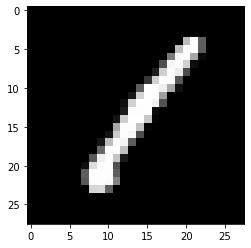

In [10]:
#displaying one digit from the train set
plt.imshow(x_train[0][:, :, 0], cmap='gray')

In [11]:
#representing the digit class as a one hot vector
y_train = to_categorical(y_train, num_classes=10)
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
#train-val split of the dataset
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [13]:
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

x_train shape: (33600, 28, 28, 1)
x_val shape: (8400, 28, 28, 1)
y_train shape: (33600, 10)
y_val shape: (8400, 10)


## CNN Model (without data augmentation)

In [53]:
def CNN_Model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3), strides = (2,2), input_shape = (28,28,1), activation = 'relu'))
    model.add(Conv2D(32, kernel_size = (3,3), strides = (2,2), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size = (3,3), strides = (2,2), padding = 'same', activation='relu'))
    model.add(Conv2D(64, kernel_size = (3,3), strides = (2,2), padding = 'same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    return model

In [54]:
#fitting the model
model = CNN_Model()
optimizer = Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history1 = model.fit(x = x_train, y = y_train, batch_size = 64, validation_data = (x_val, y_val), epochs = 20)

Epoch 1/20
525/525 [==============================] - 11s 22ms/step - loss: 0.6734 - accuracy: 0.7730 - val_loss: 0.1655 - val_accuracy: 0.9519
Epoch 2/20
525/525 [==============================] - 12s 23ms/step - loss: 0.2233 - accuracy: 0.9321 - val_loss: 0.1368 - val_accuracy: 0.9602
Epoch 3/20
525/525 [==============================] - 11s 21ms/step - loss: 0.1719 - accuracy: 0.9469 - val_loss: 0.0918 - val_accuracy: 0.9715
Epoch 4/20
525/525 [==============================] - 11s 21ms/step - loss: 0.1389 - accuracy: 0.9583 - val_loss: 0.0789 - val_accuracy: 0.9743
Epoch 5/20
525/525 [==============================] - 12s 23ms/step - loss: 0.1208 - accuracy: 0.9630 - val_loss: 0.0687 - val_accuracy: 0.9777
Epoch 6/20
525/525 [==============================] - 12s 22ms/step - loss: 0.1078 - accuracy: 0.9672 - val_loss: 0.0631 - val_accuracy: 0.9817
Epoch 7/20
525/525 [==============================] - 12s 22ms/step - loss: 0.0965 - accuracy: 0.9707 - val_loss: 0.0659 - val_accuracy:

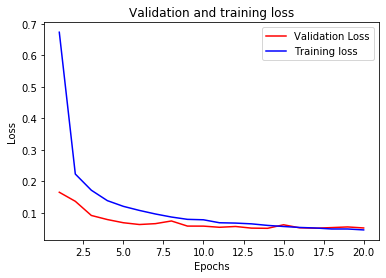

In [55]:
val_loss = history1.history['val_loss']
train_loss = history1.history['loss']
epochs = range(1,21)

plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title("Validation and training loss")
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### We obtain an validation accuracy of 98.8% for this model, which doesn't have any image augmentation.


## With image augmentation 

In [63]:
data_aug = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)
data_aug.fit(x_train)

#training model
history2 = model.fit(data_aug.flow(x_train, y_train, batch_size = 86), validation_data = (x_val, y_val), epochs = 20)

Epoch 1/20
391/391 [==============================] - 22s 57ms/step - loss: 0.0761 - accuracy: 0.9764 - val_loss: 0.0318 - val_accuracy: 0.9898
Epoch 2/20
391/391 [==============================] - 24s 61ms/step - loss: 0.0712 - accuracy: 0.9779 - val_loss: 0.0277 - val_accuracy: 0.9904
Epoch 3/20
391/391 [==============================] - 24s 61ms/step - loss: 0.0693 - accuracy: 0.9781 - val_loss: 0.0319 - val_accuracy: 0.9894
Epoch 4/20
391/391 [==============================] - 24s 62ms/step - loss: 0.0674 - accuracy: 0.9796 - val_loss: 0.0306 - val_accuracy: 0.9899
Epoch 5/20
391/391 [==============================] - 24s 61ms/step - loss: 0.0700 - accuracy: 0.9777 - val_loss: 0.0331 - val_accuracy: 0.9894
Epoch 6/20
391/391 [==============================] - 23s 58ms/step - loss: 0.0731 - accuracy: 0.9782 - val_loss: 0.0312 - val_accuracy: 0.9898
Epoch 7/20
391/391 [==============================] - 23s 58ms/step - loss: 0.0711 - accuracy: 0.9778 - val_loss: 0.0334 - val_accuracy:

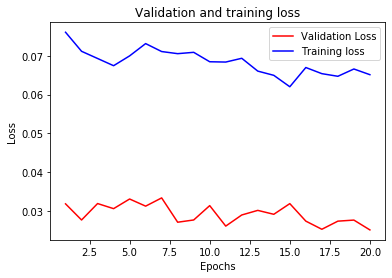

In [65]:
#plotting validation and train loss for the second model
val_loss = history2.history['val_loss']
train_loss = history2.history['loss']
epochs = range(1,21)

plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title("Validation and training loss")
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

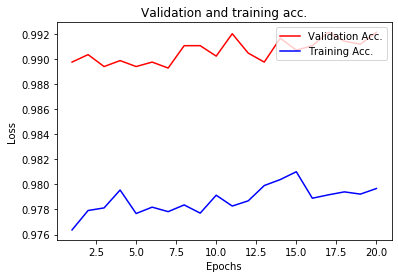

In [67]:
val_acc = history2.history['val_accuracy']
train_acc = history2.history['accuracy']
epochs = range(1,21)

plt.plot(epochs, val_acc, 'r', label='Validation Acc.')
plt.plot(epochs, train_acc, 'b', label='Training Acc.')
plt.title("Validation and training acc.")
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [68]:
data_test.shape

(28000, 28, 28, 1)

In [69]:
#predict the test data outputs for submission
pred = model.predict(data_test)
pred = np.argmax(pred, axis = 1)

pred = pd.Series(pred,name = "Label")

index = pd.Series(range(1, 28001), name = 'ImageID')

submission = pd.concat([index, pred], axis = 1)
submission

,ImageID,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [70]:
submission.to_csv("cnn_mnist.csv",index=False)